In [1]:
%%markdown

## Titanic - Predicting the survival of passengers

This is a introductory Kaggle competition. The task is desribed as follows: 
    
**The Challenge**

The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

The following notebook will follow a workflow given below:
1. Defining the case and describing it
2. Describing the data
3. Exploring the data to find potential model features
4. Data wrangling and engineering
5. Building the model
6. Evaluating the model


## Titanic - Predicting the survival of passengers

This is a introductory Kaggle competition. The task is desribed as follows: 
    
**The Challenge**

The sinking of the Titanic is one of the most infamous shipwrecks in history.
On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

The following notebook will follow a workflow given below:
1. Defining the case and describing it
2. Describing the data
3. Exploring the data to find potential model features
4. Data wrangling and engineering
5. Building the model
6. Evaluating the model


In [2]:
%%markdown

### 1) Defining and describing the problem

Following information can be derived from the descrption

- Titanic sank as a result of colliding with an iceberg
- There were 2,224 passengers on board
- There weren't enough lifeboats for everybody, which resulted in low survival rate of only **32%**
- There are some groups that were more likely to survive

Questions regarding the description

- What groups were the most likely to survive?
**inital assumptions:** <br>
affluent passengers had lower mortality rate due to better cabin placement (?), prioritizing by crew members (?) <br>
women and children were more likely to survive, due to prioritizing their health by men above their own (societal norms)

-


### 1) Defining and describing the problem

Following information can be derived from the descrption

- Titanic sank as a result of colliding with an iceberg
- There were 2,224 passengers on board
- There weren't enough lifeboats for everybody, which resulted in low survival rate of only **32%**
- There are some groups that were more likely to survive

Questions regarding the description

- What groups were the most likely to survive?
**inital assumptions:** <br>
affluent passengers had lower mortality rate due to better cabin placement (?), prioritizing by crew members (?) <br>
women and children were more likely to survive, due to prioritizing their health by men above their own (societal norms)

-


In [3]:
%%markdown

### 2) Data Description


### 2) Data Description


In [4]:
#import data manipulating packages
import pandas as pd
import numpy as np

#import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [6]:
print('Columns in train\n')
print(train.columns.values)
print('-'*30)
print('\nColumns in test\n')
print(test.columns.values)

Columns in train

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
------------------------------

Columns in test

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [7]:
print('Number of columns in train: {}\n'.format(len(train.columns.values)))
print('-'*30)
print('\nNumber of columns in test: {}'.format(len(test.columns.values)))

Number of columns in train: 12

------------------------------

Number of columns in test: 11


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
%%markdown

#### Initial Description

There are 11 columns in each dataset (the 12th column in train is the Survived dependent variable). Columns description is given below:
<br>
<br>**PassengerId** - the identification number of a passenger, this column is not relevant to this analysis and therefore will be dropped later on
<br>**Survived** - binary column indicating whether a given passenger Survived the sinkage (1) or not (0)
<br>**Pclass** - class of the passenger from high (1 - first class) to low (3 - third class) - this column indicates the wealth and social status of the passenger and as indicated before can have some predictive power
<br>**Name** - column desribing the name, surname, title and sometimes a nickname (?) of the passenger - this column will not yield much predictive power, however extracting only the title may be helpful
<br>**Sex** - binary column describing the sex of the passenger, as indicated before can potentially yield high predictive power
<br>**Age** - column with information about a passenger's age, can be correlated with the survival, because children and elderly tend to be prioritized during crises
<br>**SibSp, Parch** - columns with info whether the passenger has siblings or spouse (SibSp) and parents or children (Parch) onboard - maybe passengers without family were more (or less) likely to survive 
<br>**Ticket** - the ticket id, this column probably will not be useful in the model and therefore will be dropped
<br>**Fare** - amount the passenger paid for the trip, can be correlated with survival, cause indicates the position and wealth of the buyer
<br>**Cabin** - cabin number of the passenger, no relevant information here - will be dropped later
<br>**Embarked** - the port of embarkation (S - southampton, Q - queenstown, C - Cherbourg), can have predictive power, needs checking



#### Initial Description

There are 11 columns in each dataset (the 12th column in train is the Survived dependent variable). Columns description is given below:
<br>
<br>**PassengerId** - the identification number of a passenger, this column is not relevant to this analysis and therefore will be dropped later on
<br>**Survived** - binary column indicating whether a given passenger Survived the sinkage (1) or not (0)
<br>**Pclass** - class of the passenger from high (1 - first class) to low (3 - third class) - this column indicates the wealth and social status of the passenger and as indicated before can have some predictive power
<br>**Name** - column desribing the name, surname, title and sometimes a nickname (?) of the passenger - this column will not yield much predictive power, however extracting only the title may be helpful
<br>**Sex** - binary column describing the sex of the passenger, as indicated before can potentially yield high predictive power
<br>**Age** - column with information about a passenger's age, can be correlated with the survival, because children and elderly tend to be prioritized during crises
<br>**SibSp, Parch** - columns with info whether the passenger has siblings or spouse (SibSp) and parents or children (Parch) onboard - maybe passengers without family were more (or less) likely to survive 
<br>**Ticket** - the ticket id, this column probably will not be useful in the model and therefore will be dropped
<br>**Fare** - amount the passenger paid for the trip, can be correlated with survival, cause indicates the position and wealth of the buyer
<br>**Cabin** - cabin number of the passenger, no relevant information here - will be dropped later
<br>**Embarked** - the port of embarkation (S - southampton, Q - queenstown, C - Cherbourg), can have predictive power, needs checking


In [10]:
print('Shape of train dataset:')
print(train.shape)
print('-'*30)
print('\nShape of test dataset:')
print(test.shape)

Shape of train dataset:
(891, 12)
------------------------------

Shape of test dataset:
(418, 11)


In [11]:
print('train data column types and number of values:\n')
train.info()
print('-'*40)
print('\ntest data colum types and number of values:\n')
test.info()

train data column types and number of values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------

test data colum types and number of values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   

Null values in train data


<AxesSubplot:>

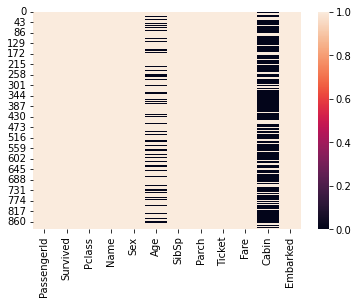

In [12]:
print('Null values in train data')
sns.heatmap(train.isnull()==False)

In [13]:
%%markdown

There are 891 rows in train data. Three columns have missing values: Cabin, Age, Embarked. Since Cabin column will be dropped there is no need to do anything with it, however null in Age and Embarked columns will have to be taken care of
<br>There are 418 rows in test data. Three columns have missing values: Age, Fare and Cabin.<br>
<br>PassengerId, Pclass, SibSp, Parch columns are integers -> those are the categorical columns, moreover Pclass, SibSp and Parch are ordinal variables
<br>Age and Fare are floats -> those are the continuous variables
<br>Name, Sex, Ticket, Cabin, Embarked are string columns -> out of those Sex is a binary variable, Embarked is categorical



There are 891 rows in train data. Three columns have missing values: Cabin, Age, Embarked. Since Cabin column will be dropped there is no need to do anything with it, however null in Age and Embarked columns will have to be taken care of
<br>There are 418 rows in test data. Three columns have missing values: Age, Fare and Cabin.<br>
<br>PassengerId, Pclass, SibSp, Parch columns are integers -> those are the categorical columns, moreover Pclass, SibSp and Parch are ordinal variables
<br>Age and Fare are floats -> those are the continuous variables
<br>Name, Sex, Ticket, Cabin, Embarked are string columns -> out of those Sex is a binary variable, Embarked is categorical


In [14]:
print('Train data description')
print(train.describe())
print('-'*40)
print('\nTest data description')
print(test.describe())

Train data description
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
----------------------------------------

Test data descri

In [15]:
print('Train')
print(train['Survived'].value_counts(normalize=True))
print('-'*30)


Train
0    0.616162
1    0.383838
Name: Survived, dtype: float64
------------------------------


In [16]:
print('train')
print(train['Pclass'].value_counts(normalize=True).sort_index())
print('-'*30)
print('test')
print(test['Pclass'].value_counts(normalize=True).sort_index())

train
1    0.242424
2    0.206510
3    0.551066
Name: Pclass, dtype: float64
------------------------------
test
1    0.255981
2    0.222488
3    0.521531
Name: Pclass, dtype: float64


In [17]:
print('train')
print(train['SibSp'].value_counts(normalize=True).sort_index())
print('-'*30)
print('test')
print(test['SibSp'].value_counts(normalize=True).sort_index())

train
0    0.682379
1    0.234568
2    0.031425
3    0.017957
4    0.020202
5    0.005612
8    0.007856
Name: SibSp, dtype: float64
------------------------------
test
0    0.677033
1    0.263158
2    0.033493
3    0.009569
4    0.009569
5    0.002392
8    0.004785
Name: SibSp, dtype: float64


In [18]:
print('train')
print(train['Parch'].value_counts(normalize=True).sort_index())
print('-'*30)
print('test')
print(test['Parch'].value_counts(normalize=True).sort_index())

train
0    0.760943
1    0.132435
2    0.089787
3    0.005612
4    0.004489
5    0.005612
6    0.001122
Name: Parch, dtype: float64
------------------------------
test
0    0.775120
1    0.124402
2    0.078947
3    0.007177
4    0.004785
5    0.002392
6    0.002392
9    0.004785
Name: Parch, dtype: float64


In [19]:
print('train')
print(train.describe(include=['O']))
print('-'*30)
print('test')
print(test.describe(include=['O']))

train
                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644
------------------------------
test
                    Name   Sex    Ticket            Cabin Embarked
count                418   418       418               91      418
unique               418     2       363               76        3
top     Kelly, Mr. James  male  PC 17608  B57 B59 B63 B66        S
freq                   1   266         5                3      270


In [20]:
%%markdown

In **train** dataset 38% of passengers survived, comparing to the overall 32% survival rate. 55% of rows are third class passengers, 20% are second-class and 24% are first-class. 
Mean age equals 29.7 years, oldest passenger is 80yo, the youngest is 0.4yo. Most of the passengers are travelling withouth sibligs or spouses (68%), 23% are traveling with one sibling or spouse, other values are rare.
Simmilarly, most passengers are travelling without either parents or children (76%), only 13% are travelling with one of the two and the rest (11%) with more than one. SibSp and Parch could be combine into one feature,
since individually the only meaningful information those columns bring is the size of the family the person is travelling with, so it is the same for both of them and if combined the picture would be complete.
Mean Fare equals 32 pounds(?), with maximum fare paid at 512 and minimum at 0 (is it an error, or some passenger's travelled for free?).

All names in the train dataset are unique. There are 577 in the table, which accounts for around 65%. There are some duplicates in Ticket column, with the most frequent id appearing 7 times. That suggests that some passengers
have the same tickets, maybe children travelling with their parents received tickets with the same id?. Similarly, there are 147 duplicates in Cabin column, possibly some passegers are sharing cabins.
Most people embarked at Southampton, over 72%.
                                                                               
The situation in test dataframe is very similar in terms of relative proportions of the values.


In **train** dataset 38% of passengers survived, comparing to the overall 32% survival rate. 55% of rows are third class passengers, 20% are second-class and 24% are first-class. 
Mean age equals 29.7 years, oldest passenger is 80yo, the youngest is 0.4yo. Most of the passengers are travelling withouth sibligs or spouses (68%), 23% are traveling with one sibling or spouse, other values are rare.
Simmilarly, most passengers are travelling without either parents or children (76%), only 13% are travelling with one of the two and the rest (11%) with more than one. SibSp and Parch could be combine into one feature,
since individually the only meaningful information those columns bring is the size of the family the person is travelling with, so it is the same for both of them and if combined the picture would be complete.
Mean Fare equals 32 pounds(?), with maximum fare paid at 512 and minimum at 0 (is it an error, or some passenger's travelled for free?).

All names in the train dataset are unique. There are 577 in the table, which accounts for around 65%. There are some duplicates in Ticket column, with the most frequent id appearing 7 times. That suggests that some passengers
have the same tickets, maybe children travelling with their parents received tickets with the same id?. Similarly, there are 147 duplicates in Cabin column, possibly some passegers are sharing cabins.
Most people embarked at Southampton, over 72%.
                                                                               
The situation in test dataframe is very similar in terms of relative proportions of the values.


In [21]:
%%markdown

### Data Exploration

#### Correlation with Survival


### Data Exploration

#### Correlation with Survival


In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
pd.crosstab(train['Pclass'], train['Survived'], normalize='index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


In [24]:
%%markdown 

We can observe that the higher the passengers' class the higher probability he/she will survive. The survival rate for first-class passengers is at 62%, whereas the same rate for third-class passengers is only 24%.
Pclass should be a good predictor of the survival.


We can observe that the higher the passengers' class the higher probability he/she will survive. The survival rate for first-class passengers is at 62%, whereas the same rate for third-class passengers is only 24%.
Pclass should be a good predictor of the survival.


In [25]:
pd.crosstab(train['Sex'], train['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [26]:
%%markdown

When analyzing sex and survived correlation, a clear trend can be seen, women were overwhelmingly more likely to survive the sinkage, over 74% of them survived, comparing to only 18.9% of men. This column should have a big
influence on survival.


When analyzing sex and survived correlation, a clear trend can be seen, women were overwhelmingly more likely to survive the sinkage, over 74% of them survived, comparing to only 18.9% of men. This column should have a big
influence on survival.


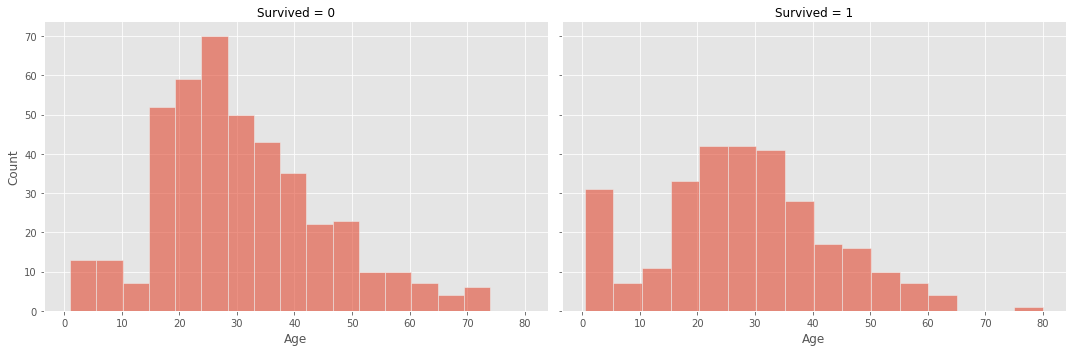

In [27]:
plt.style.use('ggplot')
grid = sns.FacetGrid(train, col='Survived', height=5, aspect=1.5, despine=True)
grid.map(sns.histplot, 'Age', alpha=.6)

In [28]:
%%markdown

Very young children were more likely to survive, confirming previous thoughts. 


Very young children were more likely to survive, confirming previous thoughts. 


In [29]:
pd.crosstab(train['SibSp'], train['Survived'], normalize='index')

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


<AxesSubplot:xlabel='SibSp'>

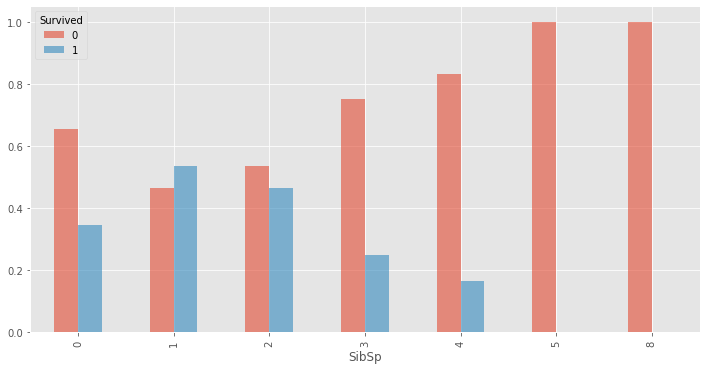

In [30]:
pd.crosstab(train['SibSp'], train['Survived'], normalize='index').plot(kind='bar', figsize=(12,6), alpha=.6)

In [31]:
pd.crosstab(train['Parch'], train['Survived'], normalize='index')

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000


<AxesSubplot:xlabel='Parch'>

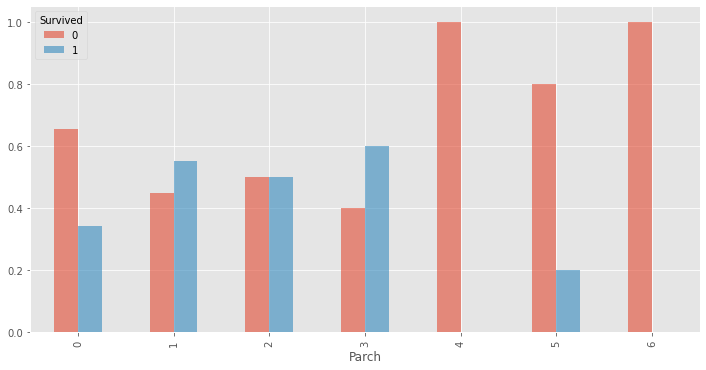

In [32]:
pd.crosstab(train['Parch'], train['Survived'], normalize='index').plot(kind='bar', figsize=(12, 6), alpha=.6)

In [33]:
%%markdown

It seems like people with very large families (more than 3 people) were less likely to survive. Lonely people have higher survival rate than large families but lower than passengers with one or two members of families with them.
I'm going to later combine the two columns to see the whole family picture.


It seems like people with very large families (more than 3 people) were less likely to survive. Lonely people have higher survival rate than large families but lower than passengers with one or two members of families with them.
I'm going to later combine the two columns to see the whole family picture.


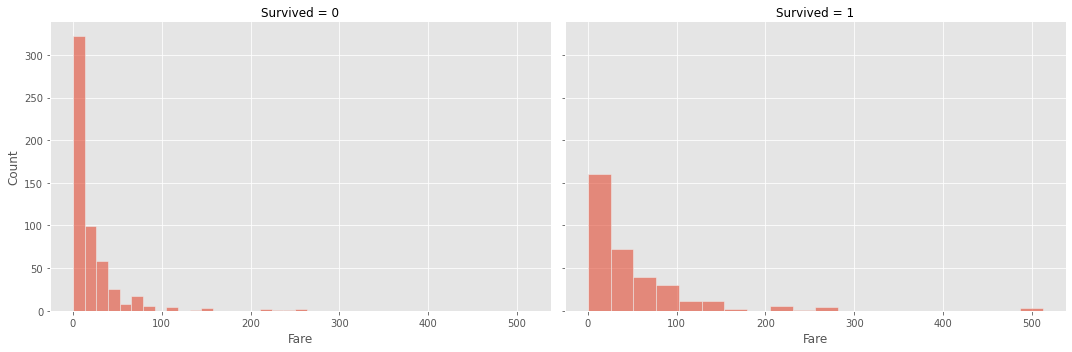

In [34]:
grid = sns.FacetGrid(train, col='Survived', height=5, aspect=1.5)
grid.map(sns.histplot, 'Fare', alpha=.6, bins=20)

In [35]:
%%markdown

People with higher Fare had bigger chance of survival. Most people with low fare (less than 50) did not survive. 
Are all people with high Fares first-class passengers?


People with higher Fare had bigger chance of survival. Most people with low fare (less than 50) did not survive. 
Are all people with high Fares first-class passengers?


In [36]:
pd.crosstab(train['Embarked'], train['Survived'], normalize='index')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


<AxesSubplot:xlabel='Embarked'>

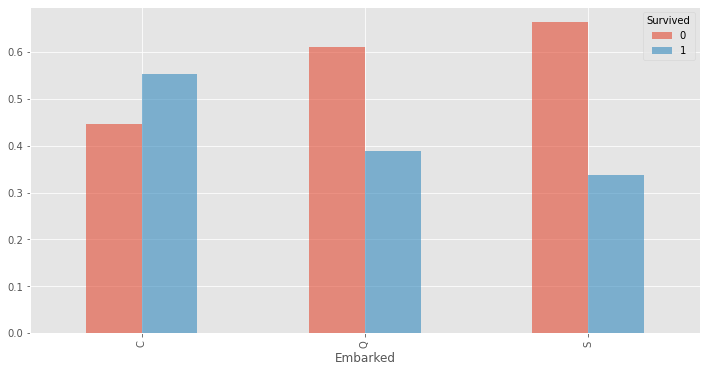

In [37]:
pd.crosstab(train['Embarked'], train['Survived'], normalize='index').plot(kind='bar', alpha=.6, figsize=(12,6))

In [38]:
%%markdown

Most people that have embarked in Southampton and Queenstown did not survive (66% and 61% respectively), whereas more than 55% of people that have embarked in Cherbourg have survived.
Were most people from Southampton from lower classes? Did they pay lower fares on average? Were they mostly young people without families?



Most people that have embarked in Southampton and Queenstown did not survive (66% and 61% respectively), whereas more than 55% of people that have embarked in Cherbourg have survived.
Were most people from Southampton from lower classes? Did they pay lower fares on average? Were they mostly young people without families?


In [39]:
%%markdown

#### Cross-column exploration


#### Cross-column exploration


In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


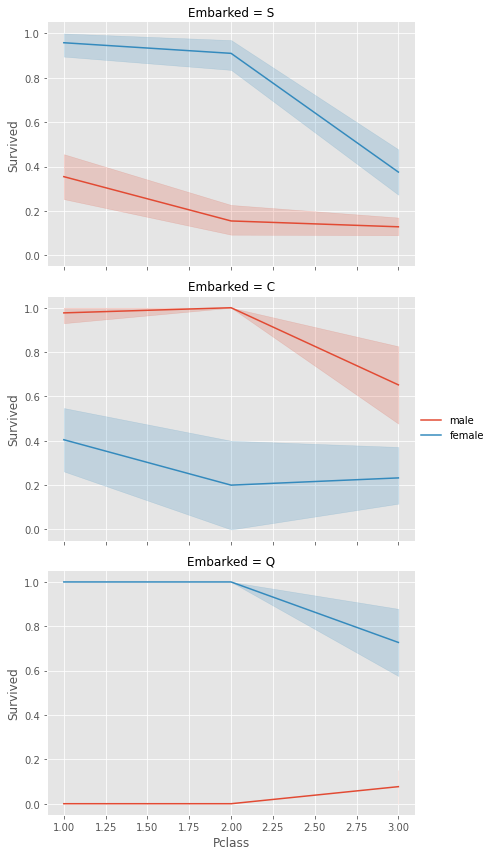

In [42]:
grid = sns.FacetGrid(train, row='Embarked', height=4, aspect=1.5)
grid.map(sns.lineplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

In [43]:
%%markdown

In general, females were more likely to survive, but analysis per port of embarkation shows that this trend, although still  present in most cases, reverses in Cherbourg. It is the port in which more people survived than died (previous analysis)
So, in Cherbourg, almost 100%  of males from the first-class survived, comparing to only 40% of women, this is a direct reversal of the situation in Southampton, were almost 100% of women from the first class survived but only
35% of men did so. Also, in Southampton we can see that as the class decreases the survival rate of women dramatically decreases as well. 


In general, females were more likely to survive, but analysis per port of embarkation shows that this trend, although still  present in most cases, reverses in Cherbourg. It is the port in which more people survived than died (previous analysis)
So, in Cherbourg, almost 100%  of males from the first-class survived, comparing to only 40% of women, this is a direct reversal of the situation in Southampton, were almost 100% of women from the first class survived but only
35% of men did so. Also, in Southampton we can see that as the class decreases the survival rate of women dramatically decreases as well. 


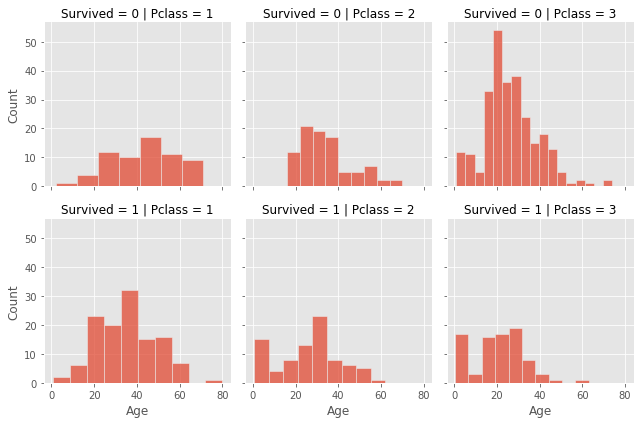

In [44]:
grid = sns.FacetGrid(data=train, row='Survived', col='Pclass')
grid.map(sns.histplot, 'Age')

In [45]:
%%markdown
We can observe that young people (less than 20 yo) were mostly from 3rd class, or some from the 2nd.
Out of those, the youngest had the highest survival rate. From the second class for exapmle every young
person (younger than ~13yo) survived. 

We can observe that young people (less than 20 yo) were mostly from 3rd class, or some from the 2nd.
Out of those, the youngest had the highest survival rate. From the second class for exapmle every young
person (younger than ~13yo) survived. 


In [46]:
%%markdown 
### 4) Data engineering

### 4) Data engineering


In [47]:
%%markdown

#### Getting rid of the nulls


#### Getting rid of the nulls


In [48]:
for df in [train, test]:
    df.drop('Cabin', axis=1, inplace=True)

In [49]:
%%markdown
Since Cabin column does not provide any meaningful information, it has been dropped.

Null values in age colum are going to be filled with the mean age for corresponding class of the passenger,
since there seem to be some correlation between the two variables. 

Since Cabin column does not provide any meaningful information, it has been dropped.

Null values in age colum are going to be filled with the mean age for corresponding class of the passenger,
since there seem to be some correlation between the two variables. 


In [50]:
for df in [train, test]:
    df['Age'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

In [51]:
%%markdown

There are two null values in Embarked column, they will be filled with the mode of the whole dataset. Also,
there is one null in test dataset in the column Fare, it will be filled with the mean.


There are two null values in Embarked column, they will be filled with the mode of the whole dataset. Also,
there is one null in test dataset in the column Fare, it will be filled with the mean.


In [52]:
for df in [train, test]:
    df['Embarked'] = df['Embarked'].fillna('S')

In [53]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [54]:
%%markdown
##### Creating new columns and preparing them for the classification

##### Creating new columns and preparing them for the classification


In [55]:
%%markdown
First, I'm going to encode Sex column to be 0 for male and 1 for female.

First, I'm going to encode Sex column to be 0 for male and 1 for female.


In [56]:
for df in [train, test]:
    df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

In [57]:
%%markdown

Next, Age column is going to be converted to 6 categories.


Next, Age column is going to be converted to 6 categories.


In [58]:
for df in [train, test]:
    df['Age'] = pd.cut(df['Age'], bins=6, labels=[1,2,3,4,5,6])

In [59]:
%%markdown

Similar to Age, the Fare column is going to be put into bins.


Similar to Age, the Fare column is going to be put into bins.


<AxesSubplot:xlabel='Fare'>

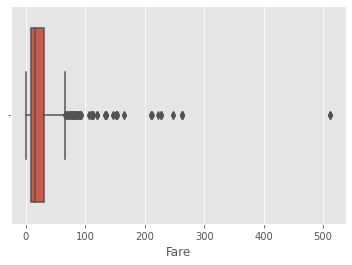

In [60]:
sns.boxplot(data=train, x='Fare')

In [61]:
for df in [train, test]:
    df['Fare'] = pd.qcut(df['Fare'], 5, labels=[1,2,3,4,5])

In [62]:
%%markdown

Combining SibSp and Parch columns


Combining SibSp and Parch columns


In [63]:
for df in [train, test]:
    df['Family'] = df['SibSp'] + df['Parch']

In [64]:
%%markdown
crating binary column Alone -> 1 - no family, 0 - has family

crating binary column Alone -> 1 - no family, 0 - has family


In [65]:
print(train['Family'].value_counts().sort_index())
print()
print(test['Family'].value_counts().sort_index())

0     537
1     161
2     102
3      29
4      15
5      22
6      12
7       6
10      7
Name: Family, dtype: int64

0     253
1      74
2      57
3      14
4       7
5       3
6       4
7       2
10      4
Name: Family, dtype: int64


In [66]:
for df in [train, test]:   
    df['Alone'] = pd.Series(np.where(df['Family'] > 0, 0, 1))

In [67]:
%%markdown
encoding Embarked column

encoding Embarked column


In [68]:
for df in [train, test]:
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [69]:
%%markdown

Dropping unnecessary columns 


Dropping unnecessary columns 


In [70]:
for df in [train, test]:
    df.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Family'], axis=1, inplace=True)

In [71]:
%%markdown

### 5) Building the Logistic Regression model


### 5) Building the Logistic Regression model


In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
x_train = train.drop(['Survived', 'PassengerId'], axis=1)
y_train = train['Survived']

In [74]:
model = LogisticRegression()

In [75]:
model.fit(x_train, y_train)

LogisticRegression()

In [76]:
%%markdown

### 6) Evaluating the model


### 6) Evaluating the model


In [77]:
model.score(x_train, y_train)

0.792368125701459

In [78]:
%%markdown
Score of the model is almost .8 which is a satisfactory number at this point

Score of the model is almost .8 which is a satisfactory number at this point


In [79]:
test['Predicted'] = model.predict(test.drop('PassengerId', axis=1))

In [80]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Alone,Predicted
0,892,3,0,3,2,2,1,0
1,893,3,1,4,1,0,0,0
2,894,2,0,5,2,2,1,0
3,895,3,0,3,2,0,1,0
4,896,3,1,2,3,0,0,1


In [ ]:
test[['PassengerId', 'Predicted']].to_csv('..')